In [3]:
# Import libraries
'''
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
'''

# Pretty display for notebooks
'''
%matplotlib inline
'''

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

import pickle
import awesome_functions as cf

# slack_url = pickle.load(open('slackUrl.pkl', 'rb'))
# slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_test = test.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [4]:
df_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [48]:
df_weather["sunrise"] = df_weather["sunrise"].apply(lambda a : str(a).strip())

In [49]:
df_weather["sunset"] = df_weather["sunset"].apply(lambda a : str(a).strip())

In [61]:
bar_df = df_weather[df_weather["sunrise"] == "-"]

In [64]:
bar_df[bar_df["station_nbr"] == 2]["date"].unique()

array(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
       '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
       '2014-01-09', '2014-01-10', '2014-01-11', '2014-01-12',
       '2014-01-13', '2014-01-14', '2014-01-15', '2014-01-16',
       '2014-01-17', '2014-01-18', '2014-01-19', '2014-01-20',
       '2014-01-21', '2014-01-22', '2014-01-23', '2014-01-24',
       '2014-01-25', '2014-01-26', '2014-01-27', '2014-01-28',
       '2014-01-29', '2014-01-30', '2014-01-31'], dtype=object)

In [65]:
bar_df[bar_df["station_nbr"] == 3]["date"].unique()

array(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
       '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
       '2014-01-09', '2014-01-10', '2014-01-11', '2014-01-12',
       '2014-01-13', '2014-01-14', '2014-01-15', '2014-01-16',
       '2014-01-17', '2014-01-18', '2014-01-19', '2014-01-20',
       '2014-01-21', '2014-01-22', '2014-01-23', '2014-01-24',
       '2014-01-25', '2014-01-26', '2014-01-27', '2014-01-28',
       '2014-01-29', '2014-01-30', '2014-01-31'], dtype=object)

In [54]:
station_2 = cf.getSpecifiedWeatherData(df_weather, 2)

In [55]:
cf.isThereNoneData(station_2)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,1035,0,0.00,0,0.00,0,0.0
1,date,1035,0,0.00,0,0.00,0,0.0
2,tmax,1035,1,0.10,0,0.00,0,0.0
3,tmin,1035,1,0.10,0,0.00,0,0.0
4,tavg,1035,12,1.16,0,0.00,0,0.0
5,depart,1035,43,4.15,0,0.00,0,0.0
6,dewpoint,1035,6,0.58,0,0.00,0,0.0
7,wetbulb,1035,16,1.55,0,0.00,0,0.0
8,heat,1035,12,1.16,0,0.00,0,0.0
9,cool,1035,12,1.16,0,0.00,0,0.0


### sunrise, sunset 데이터 sunrise_minutes, sunset_minutes로 처리

In [5]:
df_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [6]:
# 기본제거 column에서 sunset, sunrise 제외
drop_ls_dft = ["station_nbr","date", "codesum"]

df_weather_drop_dft = df_weather.drop(drop_ls_dft, axis=1)
df_weather_drop_dft.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,53,34,44,M,35,41,21,0,-,-,M,0.00,29.90,29.99,4.5,03,5.3
20513,59,34,47,M,32,41,18,0,-,-,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,67,49,58,-4,40,50,7,0,0644,1738,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,45,33,39,-6,24,32,26,0,0624,1646,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,68,50,59,M,39,50,6,0,-,-,0.0,0.00,29.57,30.27,10.5,36,11.2


In [7]:
def changeType_forsun(a):
    temp = str(a).strip()
    if temp == 'M' or temp == '-':
        return np.nan
    else:
        return a

In [8]:
cf.isThereNoneData(df_weather_drop_dft)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,tmax,20517,906,4.42,0,0.00,0,0.00
1,tmin,20517,908,4.43,0,0.00,0,0.00
2,tavg,20517,1469,7.16,0,0.00,0,0.00
3,depart,20517,11511,56.10,0,0.00,0,0.00
4,dewpoint,20517,666,3.25,0,0.00,0,0.00
5,wetbulb,20517,1252,6.10,0,0.00,0,0.00
6,heat,20517,1469,7.16,0,0.00,0,0.00
7,cool,20517,1469,7.16,0,0.00,0,0.00
8,sunrise,20517,0,0.00,0,0.00,9656,47.06
9,sunset,20517,0,0.00,0,0.00,9656,47.06


In [9]:
# sunrise, sunset에서만 "-" 데이터 np.nan으로 변환 후 nan row 삭제
df_weather_drop_dft_del_sunrow = df_weather_drop_dft.copy()
df_weather_drop_dft_del_sunrow["sunrise"] = df_weather_drop_dft_del_sunrow["sunrise"].apply(changeType_forsun)
df_weather_drop_dft_del_sunrow["sunset"] = df_weather_drop_dft_del_sunrow["sunset"].apply(changeType_forsun)
df_weather_drop_dft_del_sunrow = df_weather_drop_dft_del_sunrow.dropna()

In [10]:
cf.isThereNoneData(df_weather_drop_dft_del_sunrow)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,tmax,10861,806,7.42,0,0.00,0,0.0
1,tmin,10861,808,7.44,0,0.00,0,0.0
2,tavg,10861,859,7.91,0,0.00,0,0.0
3,depart,10861,1855,17.08,0,0.00,0,0.0
4,dewpoint,10861,540,4.97,0,0.00,0,0.0
5,wetbulb,10861,994,9.15,0,0.00,0,0.0
6,heat,10861,859,7.91,0,0.00,0,0.0
7,cool,10861,859,7.91,0,0.00,0,0.0
8,sunrise,10861,0,0.00,0,0.00,0,0.0
9,sunset,10861,0,0.00,0,0.00,0,0.0


In [12]:
def getMinutes(a):
    return (float(str(a).strip()[:2]) * 60)+ float(str(a).strip()[2:])

In [13]:
# sunrise, sunset 데이터를 분단위로 변환한 sunrise_minutes, sunset_minutes 열 생성 및 sunrise, sunset 열 삭제
df_weather_with_sunminutes = df_weather_drop_dft_del_sunrow.copy()
df_weather_with_sunminutes["sunrise_minutes"] = df_weather_with_sunminutes["sunrise"].apply(getMinutes)
df_weather_with_sunminutes["sunset_minutes"] = df_weather_with_sunminutes["sunset"].apply(getMinutes)
df_weather_with_sunminutes = df_weather_with_sunminutes.drop(["sunrise","sunset"], axis=1)
df_weather_with_sunminutes.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20507,75,50,63,-2,53,57,2,0,0.0,0.00,29.82,29.85,5.3,30,6.1,400.0,1060.0
20510,60,38,49,-7,31,42,16,0,0.0,0.00,28.98,30.36,11.9,01,12.5,411.0,1057.0
20511,50,32,41,-2,34,38,24,0,0.0,0.00,29.65,30.03,0.3,03,0.6,379.0,1000.0
20514,67,49,58,-4,40,50,7,0,0.0,0.00,29.78,30.28,10.6,36,11.2,404.0,1058.0
20515,45,33,39,-6,24,32,26,0,0.1,0.02,29.51,30.24,20.4,34,20.9,384.0,1006.0


In [14]:
cf.isThereNoneData(df_weather_with_sunminutes)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,tmax,10861,806,7.42,0,0.00,0,0.0
1,tmin,10861,808,7.44,0,0.00,0,0.0
2,tavg,10861,859,7.91,0,0.00,0,0.0
3,depart,10861,1855,17.08,0,0.00,0,0.0
4,dewpoint,10861,540,4.97,0,0.00,0,0.0
5,wetbulb,10861,994,9.15,0,0.00,0,0.0
6,heat,10861,859,7.91,0,0.00,0,0.0
7,cool,10861,859,7.91,0,0.00,0,0.0
8,snowfall,10861,1840,16.94,267,2.46,0,0.0
9,preciptotal,10861,807,7.43,1232,11.34,0,0.0


In [15]:
# VIF분석을 위해 나머지 열에서 m데이터 있는 row 삭제
df_weather_with_sunminutes_del_allrow = cf.remove_m_row(df_weather_with_sunminutes)
df_weather_with_sunminutes_del_allrow.tail()

원본 데이터프레임 length : 10861
제거하고 싶은 컬럼 : ['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'sunrise_minutes', 'sunset_minutes']
제거한 int 컬럼 : ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool']
제거한 float 컬럼 : ['depart', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed']
제거한 후 데이터프레임 length : 8763


,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20507,75.0,50.0,63.0,-2.0,53.0,57.0,2.0,0.0,0.0,0.00,29.82,29.85,5.3,30.0,6.1,400.0,1060.0
20510,60.0,38.0,49.0,-7.0,31.0,42.0,16.0,0.0,0.0,0.00,28.98,30.36,11.9,1.0,12.5,411.0,1057.0
20511,50.0,32.0,41.0,-2.0,34.0,38.0,24.0,0.0,0.0,0.00,29.65,30.03,0.3,3.0,0.6,379.0,1000.0
20514,67.0,49.0,58.0,-4.0,40.0,50.0,7.0,0.0,0.0,0.00,29.78,30.28,10.6,36.0,11.2,404.0,1058.0
20515,45.0,33.0,39.0,-6.0,24.0,32.0,26.0,0.0,0.1,0.02,29.51,30.24,20.4,34.0,20.9,384.0,1006.0


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
vif_5 = pd.DataFrame()
vif_5["VIF Factor"] = [variance_inflation_factor(df_weather_with_sunminutes_del_allrow.values, i) for i in range(df_weather_with_sunminutes_del_allrow.shape[1])]
vif_5["features"] = df_weather_with_sunminutes_del_allrow.columns
vif_5 = vif_5.sort_values("VIF Factor").reset_index(drop=True)
vif_5

,VIF Factor,features
0,1.109420,snowfall
1,1.161141,resultdir
2,1.184609,preciptotal
3,1.648914,stnpressure
4,1.853418,depart
5,1.924197,sealevel
6,2.292907,sunrise_minutes
7,4.770318,sunset_minutes
8,8.231073,resultspeed
9,9.091756,avgspeed


In [36]:
# sunrise_minutes, sunset_minutes 데이터 log값 변환
df_weather_with_sunminutes_del_allrow_log = df_weather_with_sunminutes_del_allrow.copy()
df_weather_with_sunminutes_del_allrow_log["sunrise_minutes"] = df_weather_with_sunminutes_del_allrow_log["sunrise_minutes"].apply(lambda a : np.log(a))
df_weather_with_sunminutes_del_allrow_log["sunset_minutes"] = df_weather_with_sunminutes_del_allrow_log["sunset_minutes"].apply(lambda a : np.log(a))
df_weather_with_sunminutes_del_allrow_log.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20507,75.0,50.0,63.0,-2.0,53.0,57.0,2.0,0.0,0.0,0.00,29.82,29.85,5.3,30.0,6.1,5.991465,6.966024
20510,60.0,38.0,49.0,-7.0,31.0,42.0,16.0,0.0,0.0,0.00,28.98,30.36,11.9,1.0,12.5,6.018593,6.963190
20511,50.0,32.0,41.0,-2.0,34.0,38.0,24.0,0.0,0.0,0.00,29.65,30.03,0.3,3.0,0.6,5.937536,6.907755
20514,67.0,49.0,58.0,-4.0,40.0,50.0,7.0,0.0,0.0,0.00,29.78,30.28,10.6,36.0,11.2,6.001415,6.964136
20515,45.0,33.0,39.0,-6.0,24.0,32.0,26.0,0.0,0.1,0.02,29.51,30.24,20.4,34.0,20.9,5.950643,6.913737


In [37]:
# log값 취하기 전 후 VIF는 tmin, tmax와 cool의 순서만 바뀌고 나머지는 영향없음 >>> tavg, sealevel
vif_6 = pd.DataFrame()
vif_6["VIF Factor"] = [variance_inflation_factor(df_weather_with_sunminutes_del_allrow_log.values, i) for i in range(df_weather_with_sunminutes_del_allrow_log.shape[1])]
vif_6["features"] = df_weather_with_sunminutes_del_allrow_log.columns
vif_6 = vif_6.sort_values("VIF Factor").reset_index(drop=True)
vif_6

,VIF Factor,features
0,1.109391,snowfall
1,1.163664,resultdir
2,1.184457,preciptotal
3,1.648851,stnpressure
4,1.860331,depart
5,1.919727,sealevel
6,2.190267,sunrise_minutes
7,4.760492,sunset_minutes
8,8.230501,resultspeed
9,9.098276,avgspeed


In [38]:
# corr 높은 column 삭제하고 재분석시 프로세스
# 1. remove_m_row 전단계의 DataFrame에서 해당 column 삭제
# 2. remove_m_row 실시
# 3. VIF

In [39]:
len(df_weather_with_sunminutes_del_allrow)

8763

In [41]:
df_weather_with_sunminutes_del_allrow.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20507,75.0,50.0,63.0,-2.0,53.0,57.0,2.0,0.0,0.0,0.00,29.82,29.85,5.3,30.0,6.1,400.0,1060.0
20510,60.0,38.0,49.0,-7.0,31.0,42.0,16.0,0.0,0.0,0.00,28.98,30.36,11.9,1.0,12.5,411.0,1057.0
20511,50.0,32.0,41.0,-2.0,34.0,38.0,24.0,0.0,0.0,0.00,29.65,30.03,0.3,3.0,0.6,379.0,1000.0
20514,67.0,49.0,58.0,-4.0,40.0,50.0,7.0,0.0,0.0,0.00,29.78,30.28,10.6,36.0,11.2,404.0,1058.0
20515,45.0,33.0,39.0,-6.0,24.0,32.0,26.0,0.0,0.1,0.02,29.51,30.24,20.4,34.0,20.9,384.0,1006.0


In [44]:
len(df_weather_with_sunminutes_del_allrow)

8763

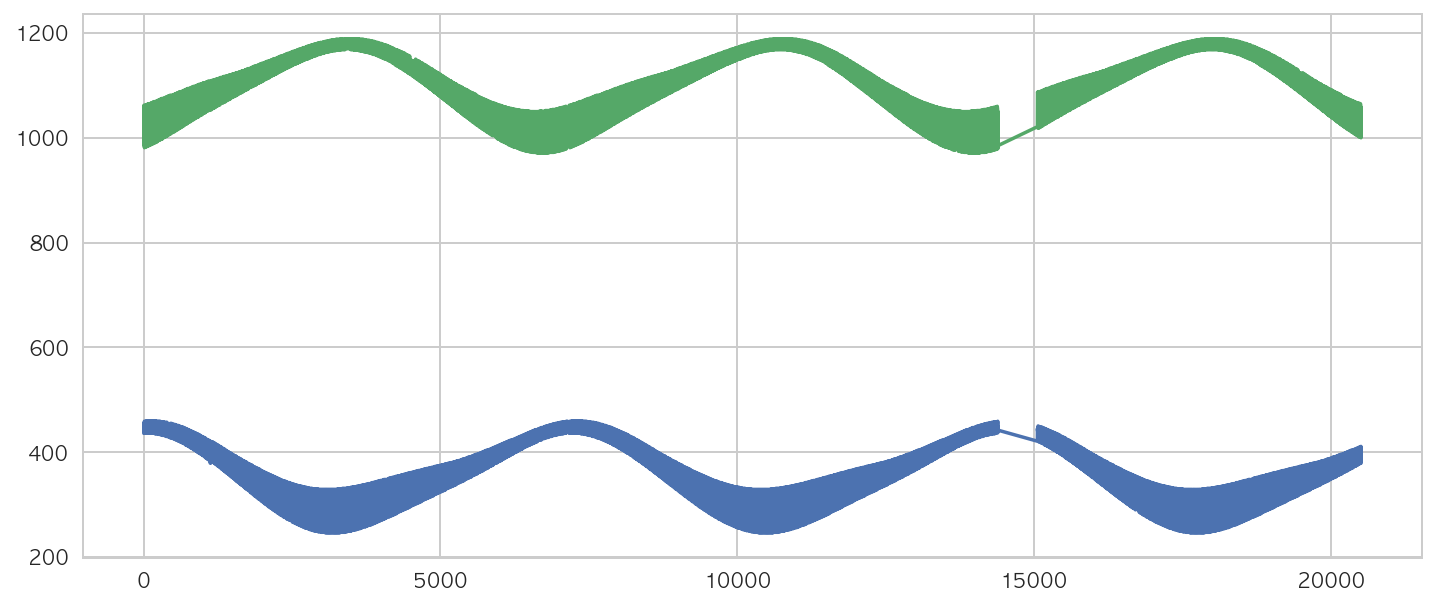

In [43]:
plt.figure(figsize=(12, 5))
plt.plot(df_weather_with_sunminutes_del_allrow[["sunrise_minutes", "sunset_minutes"]])
plt.show()

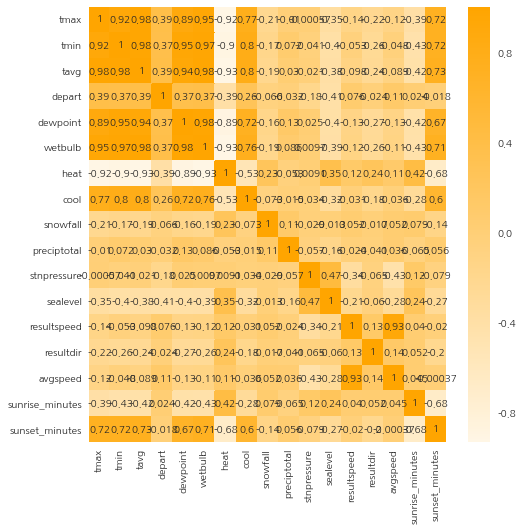

In [39]:
cmap = sns.light_palette("orange", as_cmap=True)
plt.figure(figsize=(8,8))
sns.heatmap(df_weather_with_sunminutes_del_allrow_log.corr(), annot=True, cmap=cmap)
plt.show()

### sunrise_minutes, sunset_minutes column의 missing data filling
- sunrise, sunset의 m data row를 지우고 난 뒤 계산한 sunrise_minutes, sunset_minutes column을 `m data row를 지우기 전 DataFrame`에 추가
    - `df_weather_drop_dft`에 `df_weather_with_sunminutes`의 sunrise_minutes, sunset_minutes column을 추가
- 그 DataFrame에서 sunrise_minutes, sunset_minutes column에 interpolate(선형계산) 적용해서 nan data filling

In [40]:
df_weather.tail(10)

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20507,11,2014-10-31,75,50,63,-2,53,57,2,0,0640,1740,,0.0,0.00,29.82,29.85,5.3,30,6.1
20508,12,2014-10-31,75,60,68,M,53,59,0,3,-,-,BR,0.0,0.00,29.80,29.85,7.0,32,7.5
20509,13,2014-10-31,58,35,47,M,28,37,18,0,-,-,,M,0.00,24.36,30.18,6.1,17,7.2
20510,14,2014-10-31,60,38,49,-7,31,42,16,0,0651,1737,,0.0,0.00,28.98,30.36,11.9,01,12.5
20511,15,2014-10-31,50,32,41,-2,34,38,24,0,0619,1640,,0.0,0.00,29.65,30.03,0.3,03,0.6
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [19]:
df_weather_with_sunminutes.tail()

,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20507,75,50,63,-2,53,57,2,0,0.0,0.00,29.82,29.85,5.3,30,6.1,400.0,1060.0
20510,60,38,49,-7,31,42,16,0,0.0,0.00,28.98,30.36,11.9,01,12.5,411.0,1057.0
20511,50,32,41,-2,34,38,24,0,0.0,0.00,29.65,30.03,0.3,03,0.6,379.0,1000.0
20514,67,49,58,-4,40,50,7,0,0.0,0.00,29.78,30.28,10.6,36,11.2,404.0,1058.0
20515,45,33,39,-6,24,32,26,0,0.1,0.02,29.51,30.24,20.4,34,20.9,384.0,1006.0


In [26]:
df_weather_index = df_weather.reset_index(drop=False)
df_weather_index.tail()

,index,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,20512,16,2014-10-31,53,34,44,M,35,41,21,...,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,20513,17,2014-10-31,59,34,47,M,32,41,18,...,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,20514,18,2014-10-31,67,49,58,-4,40,50,7,...,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,20515,19,2014-10-31,45,33,39,-6,24,32,26,...,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20516,20,2014-10-31,68,50,59,M,39,50,6,...,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [27]:
df_weather_with_sunminutes_index = df_weather_with_sunminutes.reset_index(drop=False)
df_weather_with_sunminutes_index.tail()

,index,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
10856,20507,75,50,63,-2,53,57,2,0,0.0,0.00,29.82,29.85,5.3,30,6.1,400.0,1060.0
10857,20510,60,38,49,-7,31,42,16,0,0.0,0.00,28.98,30.36,11.9,01,12.5,411.0,1057.0
10858,20511,50,32,41,-2,34,38,24,0,0.0,0.00,29.65,30.03,0.3,03,0.6,379.0,1000.0
10859,20514,67,49,58,-4,40,50,7,0,0.0,0.00,29.78,30.28,10.6,36,11.2,404.0,1058.0
10860,20515,45,33,39,-6,24,32,26,0,0.1,0.02,29.51,30.24,20.4,34,20.9,384.0,1006.0


In [28]:
df_weather_with_sunminutes_only_index = df_weather_with_sunminutes_index[["index","sunrise_minutes","sunset_minutes"]]
df_weather_with_sunminutes_only_index.tail()

,index,sunrise_minutes,sunset_minutes
10856,20507,400.0,1060.0
10857,20510,411.0,1057.0
10858,20511,379.0,1000.0
10859,20514,404.0,1058.0
10860,20515,384.0,1006.0


In [29]:
# ★★★선형적으로 nan값을 채우기 전의, 원래 데이터에 sunrise_minutes, sunset_minutes만 합친 완성형 weather dataframe(sunrise, sunset 포함)
df_weather_with_sunminutes = df_weather_index.merge(df_weather_with_sunminutes_only_index, on="index", how="outer" )
df_weather_with_sunminutes[df_weather_with_sunminutes["index"]==20501]

,index,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
20501,20501,5,2014-10-31,M,M,M,M,37,M,M,...,,M,M,M,30.01,10.8,05,M,376.0,1000.0


In [46]:
df_weather_with_sunminutes["sunrise_minutes"].isna().sum()

9656

In [47]:
len(df_train)

4617600

In [30]:
df_train_key = df_train.merge(df_key, on=["store_nbr"], how="inner")
len(df_train_key)

4617600

In [49]:
df_weather_with_sunminutes.columns

Index(['index', 'station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart',
       'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum',
       'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed',
       'resultdir', 'avgspeed', 'sunrise_minutes', 'sunset_minutes'],
      dtype='object')

In [50]:
len(df_weather_with_sunminutes)

20517

In [31]:
total = df_train_key.merge(df_weather_with_sunminutes, on=["date","station_nbr"], how="inner")
len(total)

4617600

In [52]:
total.tail()

,date,store_nbr,item_nbr,units,station_nbr,index,tmax,tmin,tavg,depart,...,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,sunrise_minutes,sunset_minutes
4617595,2014-10-31,35,107,0,5,20501,M,M,M,M,...,,M,M,M,30.01,10.8,05,M,376.0,1000.0
4617596,2014-10-31,35,108,0,5,20501,M,M,M,M,...,,M,M,M,30.01,10.8,05,M,376.0,1000.0
4617597,2014-10-31,35,109,0,5,20501,M,M,M,M,...,,M,M,M,30.01,10.8,05,M,376.0,1000.0
4617598,2014-10-31,35,110,0,5,20501,M,M,M,M,...,,M,M,M,30.01,10.8,05,M,376.0,1000.0
4617599,2014-10-31,35,111,0,5,20501,M,M,M,M,...,,M,M,M,30.01,10.8,05,M,376.0,1000.0


In [53]:
total["sunrise_minutes"].isna().sum()

2680539

In [54]:
cf.isThereNoneData(total)

M Data over 60% : ['depart']
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,date,4617600,0,0.00,0,0.00,0,0.00
1,store_nbr,4617600,0,0.00,0,0.00,0,0.00
2,item_nbr,4617600,0,0.00,0,0.00,0,0.00
3,units,4617600,0,0.00,0,0.00,0,0.00
4,station_nbr,4617600,0,0.00,0,0.00,0,0.00
5,index,4617600,0,0.00,0,0.00,0,0.00
6,tmax,4617600,111444,2.41,0,0.00,0,0.00
7,tmin,4617600,111333,2.41,0,0.00,0,0.00
8,tavg,4617600,187701,4.06,0,0.00,0,0.00
9,depart,4617600,3070038,66.49,0,0.00,0,0.00


In [55]:
import statsmodels.api as sm

In [32]:
total_del_nan = total.copy()
total_del_nan["sunrise_minutes"] = total_del_nan["sunrise_minutes"].apply(changeType_forsun) # nan값으로 변환
total_del_nan["sunset_minutes"] = total_del_nan["sunset_minutes"].apply(changeType_forsun) # nan값으로 변환
total_del_nan = total_del_nan.dropna()

In [33]:
total_del_nan["sunrise_minutes"].isna().sum()

0

In [34]:
total_del_nan["item_nbr"].isna().sum()

0

In [58]:
# df_weather_drop_dft_del_sunrow["sunset"] = df_weather_drop_dft_del_sunrow["sunset"].apply(changeType_forsun)
# df_weather_drop_dft_del_sunrow = df_weather_drop_dft_del_sunrow.dropna()

In [59]:
# total_nonM = cf.remove_m_row(total,["sunrise_minutes", "sunset_minutes"])
# total_nonM.tail()

In [60]:
total_del_nan.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'index',
       'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',
       'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'sunrise_minutes', 'sunset_minutes'],
      dtype='object')

In [61]:
cf.isThereNoneData(total_del_nan)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,date,1937061,0,0.00,0,0.00,0,0.0
1,store_nbr,1937061,0,0.00,0,0.00,0,0.0
2,item_nbr,1937061,0,0.00,0,0.00,0,0.0
3,units,1937061,0,0.00,0,0.00,0,0.0
4,station_nbr,1937061,0,0.00,0,0.00,0,0.0
5,index,1937061,0,0.00,0,0.00,0,0.0
6,tmax,1937061,90687,4.68,0,0.00,0,0.0
7,tmin,1937061,90687,4.68,0,0.00,0,0.0
8,tavg,1937061,99123,5.12,0,0.00,0,0.0
9,depart,1937061,389499,20.11,0,0.00,0,0.0


In [ ]:
total_del

In [37]:
model = sm.OLS.from_formula("units ~ C(item_nbr):sunrise_minutes + C(item_nbr):sunset_minutes + 0", data=total_del_nan)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1859.
Date:                Mon, 02 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:21:24   Log-Likelihood:            -7.1125e+06
No. Observations:             1937061   AIC:                         1.423e+07
Df Residuals:                 1936839   BIC:                         1.423e+07
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
C(item_n